In [3]:
from pandas import read_csv, set_option
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter
from matplotlib import pyplot as plt
from toad.detector import detect

set_option("display.width", 10000)
set_option("display.max_rows", None)
set_option("display.max_columns", None)

In [12]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
 
survival_data=pd.read_csv("data/Telco-Customer-Churn.csv")
survival_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
survival_data['TotalCharges']= survival_data['TotalCharges'].replace([' '], '0')
survival_data['TotalCharges']= pd.to_numeric(survival_data['TotalCharges'])
survival_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<AxesSubplot:xlabel='Churn', ylabel='count'>

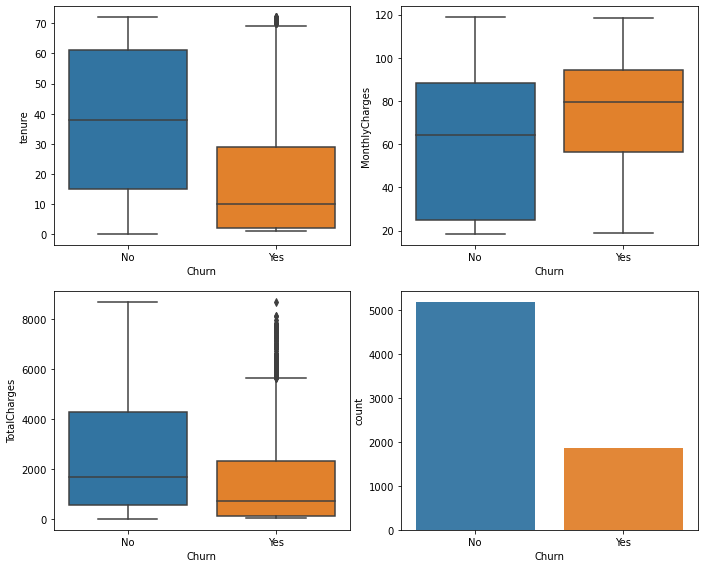

In [20]:
fig,axes= plt.subplots(nrows=2,ncols=2, figsize=(10,8))
keyvalue= survival_data[['tenure','MonthlyCharges','TotalCharges']]
for ax,column in zip(axes.ravel(),keyvalue):
    sns.boxplot(x=survival_data['Churn'],
          y=keyvalue[column], ax=ax)
    plt.tight_layout()
sns.countplot(x=survival_data['Churn'],alpha=.95)

In [22]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data, test_size=0.2)
from lifelines import CoxPHFitter

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6702 to 3270
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             5634 non-null   object 
 1   SeniorCitizen                          5634 non-null   int64  
 2   tenure                                 5634 non-null   int64  
 3   MonthlyCharges                         5634 non-null   float64
 4   TotalCharges                           5634 non-null   float64
 5   gender_Male                            5634 non-null   float64
 6   Partner_Yes                            5634 non-null   float64
 7   Dependents_Yes                         5634 non-null   float64
 8   PhoneService_Yes                       5634 non-null   float64
 9   MultipleLines_No phone service         5634 non-null   float64
 10  MultipleLines_Yes                      5634 non-null   float64
 11  I

C:\ProgramData\Anaconda3\lib\site-packages\lifelines\plotting.py:723: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 25 individuals.")


Text(0.5, 0, 'Months')

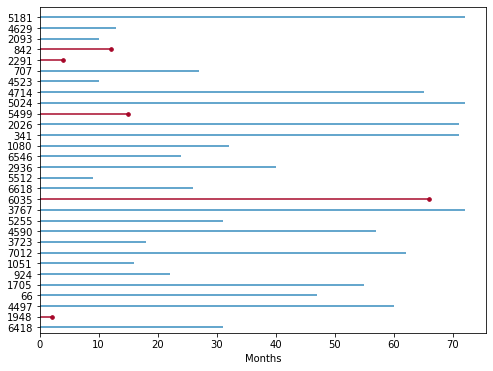

In [38]:
from lifelines.plotting import plot_lifetimes
df_sample = data.sample(n=30,random_state=10)
df_sample['Churn_Yes'] = np.where(df_sample['Churn_Yes']== 1,True,False)
plt.figure(figsize=[8,6])
ax = plot_lifetimes(df_sample['tenure'], event_observed=df_sample['Churn_Yes'],sort_by_duration=False)
ax.vlines(96, 0, 30, lw=2, linestyles='--',colors='black')
plt.xlabel("Months")

In [40]:
from lifelines.utils import survival_table_from_events

#原本数据是生存时间是以月位单位的，现在特意计算成以年位单位，然后制作寿命表
def months_to_year(x):
    if x % 12 ==0:
        return x /12
    else:
        return int(x/12)+1 
T = data['tenure'].map(months_to_year)
E = data['Churn_Yes']
survival_table_from_events(T, E,columns=['removed', 'observed', 'censored', 'entrance', 'at_risk'])


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,11,0,11,7043,7043
1.0,2175,1037,1138,0,7032
2.0,1024,294,730,0,4857
3.0,832,180,652,0,3833
4.0,762,145,617,0,3001
5.0,832,120,712,0,2239
6.0,1407,93,1314,0,1407


In [53]:
model =CoxPHFitter(penalizer=0.01, l1_ratio=0)
model =model.fit(train_data.drop("customerID",axis=1), 'tenure','Churn_Yes',show_progress=True)
model.print_summary()

Iteration 1: norm_delta = 1.78470, step_size = 0.9500, log_lik = -12180.14279, newton_decrement = 1739.43309, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.81135, step_size = 0.9500, log_lik = -10424.31110, newton_decrement = 256.80785, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.46196, step_size = 0.9500, log_lik = -10139.38333, newton_decrement = 35.33820, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.08339, step_size = 1.0000, log_lik = -10100.76243, newton_decrement = 0.93459, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00267, step_size = 1.0000, log_lik = -10099.80914, newton_decrement = 0.00095, seconds_since_start = 0.0
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -10099.80818, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 6 iterations.


C:\ProgramData\Anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 5634 total observations, 4140 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
                penalizer = 0.01
                 l1 ratio = 0
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1494
   partial log-likelihood = -10099.81
         time fit was run = 2022-07-07 08:45:00 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
SeniorCitizen                           0.02       1.02       0.06            -0.10             0.15                 0.91                 1.16
MonthlyCharges                          0.01       1.01       0.00            -0.00             0.01                 1.00                 1.01
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
gender_Male                            -0.04       0.96       0.05            -0.14             0.06                 0.87                 1.06
Partner_Yes                            -0.27       0.77       0.06            -0.38            -0.15                 0.68                 0.86
Dependents_Yes                         -0.09       0.92       0.07            -0.23             0.06                 0.79                 1.06
PhoneService_Yes                        0.26       1.30       0.33            -0.38             0.91                 0.68                 2.48
MultipleLines_No phone service         -0.26       0.77       0.33            -0.91             0.38                 0.40                 1.46
MultipleLines_Yes                      -0.00       1.00       0.06            -0.12             0.11                 0.89                 1.12
InternetService_DSL                    -0.33       0.72       0.20            -0.71             0.06                 0.49                 1.06
InternetService_Fiber optic             0.58       1.78       0.20             0.18             0.97                 1.20                 2.63
OnlineSecurity_No internet service     -0.41       0.67       0.30            -1.00             0.18                 0.37                 1.20
OnlineSecurity_Yes                     -0.30       0.74       0.07            -0.45            -0.16                 0.64                 0.85
OnlineBackup_No internet service       -0.41       0.67       0.30            -1.00             0.18                 0.37                 1.20
OnlineBackup_Yes                       -0.17       0.84       0.06            -0.29            -0.05                 0.75                 0.96
DeviceProtection_No internet service   -0.41       0.67       0.30            -1.00             0.18                 0.37                 1.20
DeviceProtection_Yes                    0.02       1.02       0.06            -0.10             0.14                 0.90                 1.15
TechSupport_No internet service        -0.41       0.67       0.30            -1.00             0.18                 0.37                 1.20
TechSupport_Yes                        -0.15       0.86       0.07            -0.30            -0.01                 0.74                 0.99
StreamingTV_No internet service        -0.41       0.67       0.30            -1.00             0.18                 0.37                 1.20
StreamingTV_Yes                         0.22       1.25       0.07             0.09             0.36                 1.09                 1.44
StreamingMovies_No internet service    -0.41       0.67       0.30            -1.00             0.18                 0.37                 1.20
StreamingMovies_Yes                     0.20       1.22       0.07             0.06             0.33                 1.06               

Text(0.5, 0, 'HazardRatios (95% CI)')

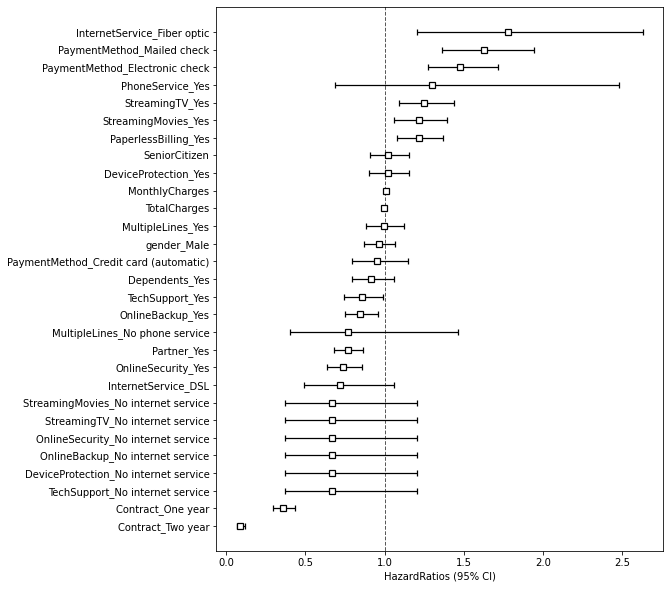

In [42]:
"""
结合上面的print_summary()表格看出，协变量的95%置信度区间跨过横坐标轴上1的协变量的p值都是大于0.05,而效果好的变量 如Contract_Two year
p值小于0.005具有显著性
"""
plt.figure(figsize= (8,10))
model.plot(hazard_ratios=True)
plt.xlabel('HazardRatios (95% CI)')

<AxesSubplot:>

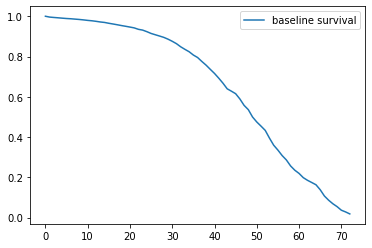

In [50]:
cph.baseline_survival_.plot()

<AxesSubplot:>

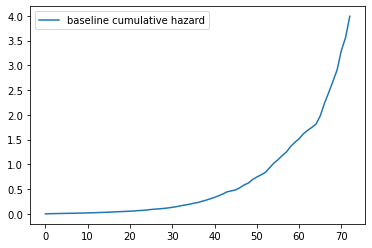

In [51]:
cph.baseline_cumulative_hazard_.plot()

In [67]:
print(model.predict_partial_hazard(pd.DataFrame(test_data.iloc[1]).T))#预测个体的风险


5825    77.900929
dtype: float64


In [71]:
print(model.predict_percentile(pd.DataFrame(test_data.iloc[1]).T,p=0.9))#预测个体第90.0分位数的生存时间

1.0


In [72]:
print(model.predict_median(pd.DataFrame(test_data.iloc[1]).T))#预测个体的中位生存时间

5.0


In [73]:
print(model.predict_cumulative_hazard(test_data.iloc[1]))#预测个体的累积风险函数

            5825
0.0     0.000000
1.0     0.288005
2.0     0.421656
3.0     0.542322
4.0     0.671075
5.0     0.786221
6.0     0.864772
7.0     0.985576
8.0     1.103874
9.0     1.257946
10.0    1.415266
11.0    1.539226
12.0    1.712223
13.0    1.908701
14.0    2.030446
15.0    2.229164
16.0    2.434046
17.0    2.672952
18.0    2.917229
19.0    3.142721
20.0    3.361018
21.0    3.636307
22.0    4.009689
23.0    4.194055
24.0    4.605157
25.0    5.109182
26.0    5.436326
27.0    5.707989
28.0    6.005960
29.0    6.569382
30.0    7.075032
31.0    7.582600
32.0    8.322974
33.0    9.092883
34.0    9.869532
35.0   10.887846
36.0   11.533473
37.0   12.628302
38.0   13.849898
39.0   15.448273
40.0   17.077478
41.0   19.085938
42.0   21.175643
43.0   23.343684
44.0   24.239366
45.0   25.466109
46.0   27.861982
47.0   31.773855
48.0   33.795333
49.0   38.576368
50.0   41.992641
51.0   44.381449
52.0   48.697838
53.0   55.593186
54.0   63.251203
55.0   69.623884
56.0   77.249312
57.0   84.7861

In [74]:
print(model.predict_survival_function(test_data.iloc[1]))#预测个体的生存函数

               5825
0.0    1.000000e+00
1.0    7.497577e-01
2.0    6.559600e-01
3.0    5.813968e-01
4.0    5.111586e-01
5.0    4.555631e-01
6.0    4.211475e-01
7.0    3.732244e-01
8.0    3.315841e-01
9.0    2.842373e-01
10.0   2.428610e-01
11.0   2.145472e-01
12.0   1.804642e-01
13.0   1.482729e-01
14.0   1.312770e-01
15.0   1.076184e-01
16.0   8.768138e-02
17.0   6.904812e-02
18.0   5.408334e-02
19.0   4.316517e-02
20.0   3.469992e-02
21.0   2.634948e-02
22.0   1.813903e-02
23.0   1.508499e-02
24.0   1.000013e-02
25.0   6.041020e-03
26.0   4.355455e-03
27.0   3.319341e-03
28.0   2.464024e-03
29.0   1.402663e-03
30.0   8.459658e-04
31.0   5.092357e-04
32.0   2.428725e-04
33.0   1.124634e-04
34.0   5.172691e-05
35.0   1.868394e-05
36.0   9.796620e-06
37.0   3.277919e-06
38.0   9.661971e-07
39.0   1.953891e-07
40.0   3.831296e-08
41.0   5.141410e-09
42.0   6.361139e-10
43.0   7.277244e-11
44.0   2.971510e-11
45.0   8.713839e-12
46.0   7.937707e-13
47.0   1.587779e-14
48.0   2.103166e-15


In [54]:
from lifelines.utils import concordance_index
C_index =concordance_index(test_data['tenure'],-model.predict_partial_hazard(test_data.drop('customerID',axis=1)),test_data['Churn_Yes'])
print('The concordance of the Cox model on the testsubsample is: ', round(C_index*100),'%')

The concordance of the Cox model on the testsubsample is:  92 %


Text(0.5, 1.0, 'Calibration plots (reliabilitycurve)')

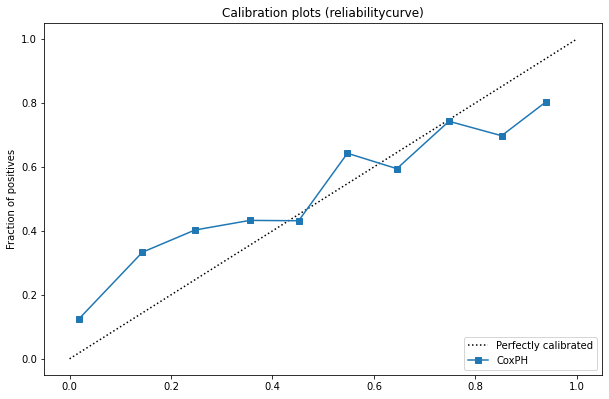

In [37]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax1.plot([0, 1], [0, 1], "k:",label="Perfectly calibrated")
probs =1-np.array(model.predict_survival_function(test_data).loc[13])
 
actual = test_data['Churn_Yes']
fraction_of_positives, mean_predicted_value =calibration_curve(actual, probs, n_bins=10, normalize=False)
 
ax1.plot(mean_predicted_value,fraction_of_positives, "s-", label="%s" %("CoxPH",))
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliabilitycurve)')